# FPL Machine Learning 2

In [2]:
#This time I am going to try to build a model which uses the same data as before, but this time to make an active prediction of the points per minute score.


In [70]:
#First lets import our dependancies and clean the data a little.
import pandas as pd
import numpy as np
import io
import requests
from matplotlib import pyplot as plt
url = 'https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2019-20/cleaned_players.csv'
read_data = requests.get(url).content
address = pd.read_csv(io.StringIO(read_data.decode('utf-8')))

In [71]:
#Removing any players who have played fewer than 400 minutes (about 4.5 matches) this season.
address = address[address.minutes > 400]
address

,first_name,second_name,goals_scored,assists,total_points,minutes,goals_conceded,creativity,influence,threat,bonus,bps,ict_index,clean_sheets,red_cards,yellow_cards,selected_by_percent,now_cost
0,Shkodran,Mustafi,0,2,19,440,7,13.2,128.8,79.0,1,101,22.2,1,0,0,0.3,51
1,Héctor,Bellerín,1,0,17,442,8,28.1,103.8,28.0,3,81,16.1,1,0,2,0.8,54
2,Sead,Kolasinac,0,2,34,1086,18,156.3,190.0,67.0,1,219,41.2,2,0,3,0.5,52
3,Ainsley,Maitland-Niles,0,2,36,1210,19,155.4,261.8,37.0,3,216,44.9,3,1,3,2.5,46
4,Sokratis,Papastathopoulos,2,0,52,1606,25,31.8,431.6,106.0,5,286,57.1,3,0,5,1.4,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,Rúben Diogo,da Silva Neves,2,1,61,1952,27,266.0,347.8,189.0,4,316,80.5,5,0,6,4.4,52
606,João Filipe Iria,Santos Moutinho,1,7,85,2155,30,848.0,557.6,108.0,11,450,151.7,5,0,5,5.2,54
608,Adama,Traoré,4,7,103,1925,28,555.7,588.0,454.0,14,437,159.9,4,0,0,19.9,58
611,Leander,Dendoncker,2,0,62,1998,29,93.1,389.2,190.0,6,309,67.2,4,0,2,9.8,44


In [72]:
#Calculating the points per minute.
I = range(0,len(address))
J = list(I)
for i in I:
    J[i] = address.iloc[i]['total_points'] / address.iloc[i]['minutes']
address.insert(18, 'points_per_minute', J)
print(address.head())

#Recall:
avg_ppm = 0.03855688421706641

  first_name       second_name  goals_scored  assists  total_points  minutes  \
0   Shkodran           Mustafi             0        2            19      440   
1     Héctor          Bellerín             1        0            17      442   
2       Sead         Kolasinac             0        2            34     1086   
3    Ainsley    Maitland-Niles             0        2            36     1210   
4   Sokratis  Papastathopoulos             2        0            52     1606   

   goals_conceded  creativity  influence  threat  bonus  bps  ict_index  \
0               7        13.2      128.8    79.0      1  101       22.2   
1               8        28.1      103.8    28.0      3   81       16.1   
2              18       156.3      190.0    67.0      1  219       41.2   
3              19       155.4      261.8    37.0      3  216       44.9   
4              25        31.8      431.6   106.0      5  286       57.1   

   clean_sheets  red_cards  yellow_cards  selected_by_percent  now_c

In [73]:
#spliting the data into training and testing, roughly 80% will be training, 20% testing.

msk = np.random.rand(len(address)) < 0.8

train = address[msk]   #Splitting the whole data
test = address[~msk]


#removing the unwanted columns.
#We drop the names because they are strings and the model cant use them, we can use the index to identify players later
data_train = train.drop(['total_points', 'minutes', 'first_name', 'second_name', 'points_per_minute'], 1)   
data_test = test.drop(['total_points', 'minutes', 'first_name', 'second_name', 'points_per_minute'], 1)

ppm_train_1 = address[msk][['points_per_minute']]
ppm_test_1 = address[~msk][['points_per_minute']]
#Need these to be a series format in order for use of LogisticRegression().
ppm_train = ppm_train_1['points_per_minute']
ppm_test = ppm_test_1['points_per_minute']    

In [74]:
data_train.shape   #pre-modelling dimensionality checks

(289, 14)

In [75]:
ppm_train.shape

(289,)

# Linear Regression

In [76]:
#Importing and applying the model

from sklearn import linear_model, datasets
from sklearn.metrics import mean_squared_error, r2_score

lin_reg = linear_model.LinearRegression()
lin_reg.fit(data_train,ppm_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [77]:
lin_reg_predictions = lin_reg.predict(data_test)
lin_reg_predictions

array([0.04489629, 0.03316059, 0.0276283 , 0.03310833, 0.02764601,
       0.04098534, 0.03404247, 0.0382125 , 0.03374556, 0.03423487,
       0.03529309, 0.03850858, 0.04784331, 0.0308771 , 0.03557056,
       0.03360287, 0.02483905, 0.05344412, 0.03424674, 0.03175783,
       0.04828573, 0.08051055, 0.04778246, 0.04220586, 0.04167023,
       0.0277106 , 0.04290581, 0.04146622, 0.05402233, 0.04875154,
       0.09221493, 0.08276026, 0.03001414, 0.03942645, 0.03515156,
       0.04042283, 0.04742411, 0.02671354, 0.03771805, 0.04345416,
       0.01927581, 0.02707357, 0.03510299, 0.03139232, 0.03754436,
       0.04660085, 0.04715056, 0.0406952 , 0.04823039, 0.04067878,
       0.03467578, 0.04817719, 0.0370543 , 0.02335258, 0.02706   ,
       0.04565129, 0.03372295, 0.03824919, 0.03288419, 0.03026852,
       0.03289708, 0.03510193, 0.03248061])

In [78]:
#Mustafi test:
mustafi_test = address.loc[address['second_name'] == 'Mustafi']
#Removing the required columns.
mustafi_test_1 = mustafi_test.drop(['total_points', 'minutes','first_name', 'second_name', 'points_per_minute'], 1) 
#Calling the model, should return 0.06550......
lin_reg.predict(mustafi_test_1)[0]

0.04489629091031857

In [79]:
#So we can see that our model returns some numbers, time to find how accurate they are.
#First lets build a function to extract a specific players prediction.
#Note: I can already see a problem that the model returns negative values.

In [80]:
def predictedpoints_lr(fn, sn):
    i = address.loc[address['first_name'] == fn].index[0]
    j = address.loc[address['second_name'] == sn].index[0]    #Finding the index from the name.
    if i == j:
        a = address.loc[address['second_name'] == sn]
        b = a.drop(['total_points', 'minutes','first_name', 'second_name', 'points_per_minute'], 1) 
        c = lin_reg.predict(b)[0]
        return c * a.iloc[0]['minutes']
    else:
        print('First name index does not match the last, likely there are multiple players with that name.')
        
def predictedppm_lr(fn, sn):
    i = address.loc[address['first_name'] == fn].index[0]
    j = address.loc[address['second_name'] == sn].index[0]    #Finding the index from the name.
    if i == j:
        a = address.loc[address['second_name'] == sn]
        b = a.drop(['total_points', 'minutes','first_name', 'second_name', 'points_per_minute'], 1) 
        c = lin_reg.predict(b)[0]
        return c 
    else:
        print('First name index does not match the last, likely there are multiple players with that name.')
    

In [81]:
#Lets test a couple of names:
predictedpoints_lr('Shkodran', 'Mustafi')

19.754368000540172

In [186]:
#Mustafi currently has 19 points! An excellent first guess, lets try Alexander-Arnold.
predictedpoints_lr('Trent', 'Alexander-Arnold')

156.2094763230829

In [177]:
address.loc[address['second_name'] == 'Alexander-Arnold']

,first_name,second_name,goals_scored,assists,total_points,minutes,goals_conceded,creativity,influence,threat,bonus,bps,ict_index,clean_sheets,red_cards,yellow_cards,selected_by_percent,now_cost,points_per_minute
273,Trent,Alexander-Arnold,2,12,146,2189,15,1010.6,731.6,300.0,14,636,204.2,10,0,4,43.5,77,0.066697


In [ ]:
#He has 146, not as good as Mustafi's prediction but still fairly close.

In [82]:
#Lets visualise how well the model does by plotting its predictions against the true values for the whole dataset.
#First I'll sort the dataframe in ascending order by points per minute, hopefully this will look a bit nicer.
address_1 = address.sort_values(by = 'points_per_minute', ascending = 1)
print(address_1.head())

    first_name second_name  goals_scored  assists  total_points  minutes  \
186    Mamadou       Sakho             0        0             7      465   
399        Ben     Godfrey             0        0            24     1564   
403      Grant      Hanley             0        0            14      901   
525       José     Holebas             0        0            16     1004   
37     Kortney       Hause             0        0            13      810   

     goals_conceded  creativity  influence  threat  bonus  bps  ict_index  \
186               8        13.2       86.0     6.0      0   69       10.6   
399              35        17.9      367.8    41.0      0  279       42.9   
403              20         2.4      224.4    72.0      1  143       30.0   
525              26       207.8      170.0    62.0      0  141       43.8   
37               19        20.7      200.8    37.0      0  104       25.9   

     clean_sheets  red_cards  yellow_cards  selected_by_percent  now_cost  \
186

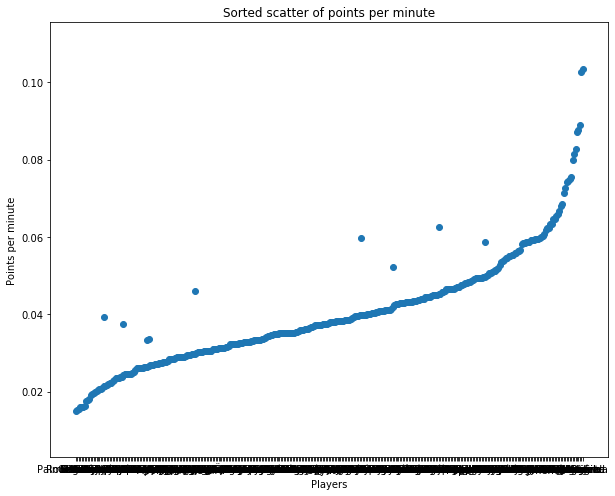

In [83]:
players = address_1.loc[:, 'second_name']
ppm = address_1.loc[:, 'points_per_minute']

plt.figure(figsize = (10,8))
plt.scatter(players,ppm)

plt.xlabel('Players')
plt.ylabel('Points per minute')
plt.title("Sorted scatter of points per minute")

plt.show()

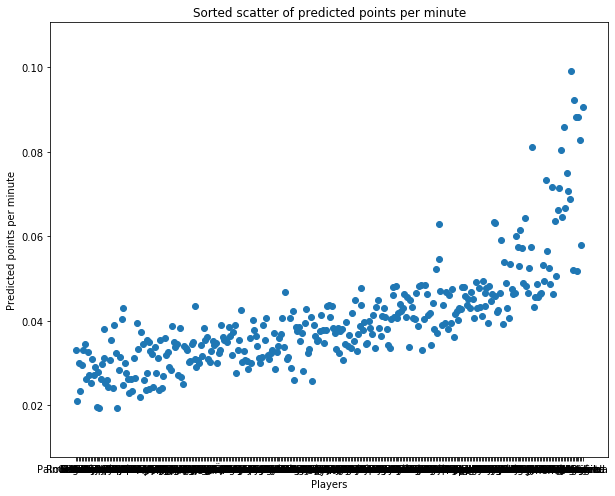

In [84]:
predictions_full = lin_reg.predict(address_1.drop(['first_name', 'second_name', 'total_points', 'minutes', 'points_per_minute'], 1))

players = address_1.loc[:, 'second_name']


plt.figure(figsize = (10,8))

plt.scatter(players,predictions_full)

plt.xlabel('Players')
plt.ylabel('Predicted points per minute')
plt.title("Sorted scatter of predicted points per minute")

plt.show()

In [85]:
#We can see a loose upward trend in the predictions which matches the actual data, indicative of a strong relationship.
#Lets test the relationship between the model and the response variable using a simple R^2 test.

In [86]:
rsquared = lin_reg.score(data_test, ppm_test)
print(rsquared)

0.8103744644577228


In [61]:
#This is a pretty good score, I think there are too many different variables though.
#To make a more useful model with a higher R^2 I will try again with only a few factors.
#Just for fun, lets make a polynomial regression model with all the factors first.

# Ploynomial Regression

In [87]:
from sklearn.preprocessing import PolynomialFeatures

#First lets transform the data by adding squared terms so that we can then model linearly, but still end up with a polynomial model.
poly_reg = PolynomialFeatures(degree = 2)
data_poly = poly_reg.fit_transform(data_train)
test_poly = poly_reg.fit_transform(data_test)

full_data_poly = poly_reg.fit_transform(address_1.drop(['first_name', 'second_name', 'total_points', 'minutes', 'points_per_minute'], 1))
full_data_poly

array([[1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.0000e-02, 5.0000e+00,
        2.5000e+03],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.0000e-02, 4.4000e+00,
        1.9360e+03],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 4.4100e+00, 8.4000e+01,
        1.6000e+03],
       ...,
       [1.0000e+00, 7.0000e+00, 9.0000e+00, ..., 9.4090e+01, 8.3420e+02,
        7.3960e+03],
       [1.0000e+00, 3.0000e+00, 3.0000e+00, ..., 6.2500e+00, 1.3000e+02,
        2.7040e+03],
       [1.0000e+00, 1.6000e+01, 4.0000e+00, ..., 6.0516e+02, 2.9766e+03,
        1.4641e+04]])

In [88]:
#Building the model as before
lin_reg_2 = linear_model.LinearRegression()
lin_reg_2.fit(data_poly, ppm_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

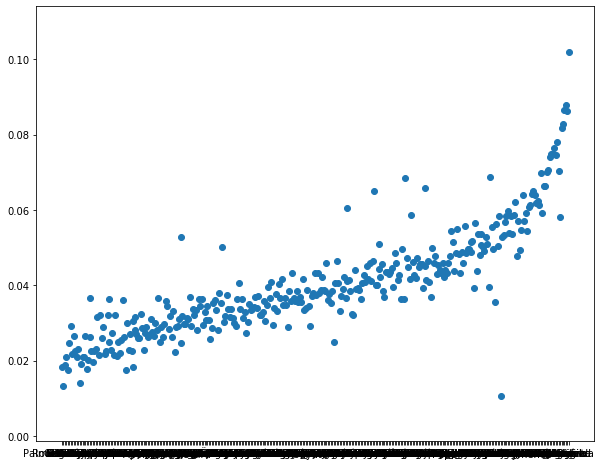

In [89]:
predictions_1 = lin_reg_2.predict(full_data_poly)

plt.figure(figsize = (10,8))

plt.scatter(players, predictions_1)



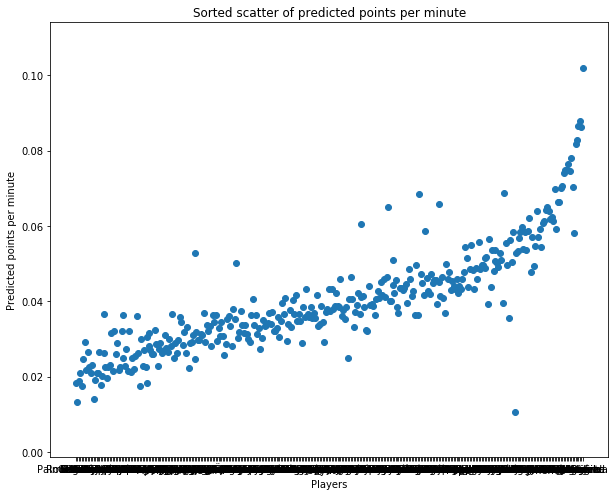

In [90]:
plt.figure(figsize = (10,8))

plt.scatter(players, predictions_1)

plt.xlabel('Players')
plt.ylabel('Predicted points per minute')
plt.title("Sorted scatter of predicted points per minute")

plt.show()

In [91]:
#Again we see a similar upward trend as the linear model, but, as expected, it does not look a significant improvement.
#Lets calculate R^2 again to confirm.

rsquared_1 = lin_reg_2.score(test_poly, ppm_test)
print(rsquared_1)

0.5269070206770468


In [ ]:
#This is worse than our linear model, lets go back to that, but try with fewer factors to see if we can improve our R^2.

# Fewer Factors

In [182]:
#Having played around with using different combinations of factors, I have found that only the following are needed:
#Goals scored, assists, goals conceded, bps and yellow and red cards.
#With only these we can achieve the same R^2 as our first model using all the data.
address_ict = address[['first_name', 'second_name', 'goals_scored', 'assists', 'goals_conceded', 'bps', 'red_cards', 'yellow_cards' ]]
address_ict.head()

,first_name,second_name,goals_scored,assists,goals_conceded,bps,red_cards,yellow_cards
0,Shkodran,Mustafi,0,2,7,101,0,0
1,Héctor,Bellerín,1,0,8,81,0,2
2,Sead,Kolasinac,0,2,18,219,0,3
3,Ainsley,Maitland-Niles,0,2,19,216,1,3
4,Sokratis,Papastathopoulos,2,0,25,286,0,5


In [183]:
data_train_ict = data_train[['goals_scored', 'assists', 'goals_conceded', 'bps', 'red_cards', 'yellow_cards']]


In [184]:
lin_reg_ict = linear_model.LinearRegression()
lin_reg_ict.fit(data_train_ict,ppm_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [185]:
data_test_ict = data_test[['goals_scored', 'assists', 'goals_conceded', 'bps',  'red_cards', 'yellow_cards']]
rsquared_ict = lin_reg_ict.score(data_test_ict, ppm_test)
print(rsquared_ict)

0.8161113010145683


In [ ]:
#I would conclude then that this is the optimal regression model for this dataset.

#Note: An interesting follow-up project would be to predict the players current fantasy market value instead.